# Sales Analysis and Visualization for an Electronics Retail Company
----------------------

In this project, a sample dataset from an electronic retail company is explored and the insights from the data are obtained. Mainly, pandas and Matplotlib along with some other visualization libraries.

Here, after the data is cleaned, several questions are answered on by one through modification in the data frame and visualizations




### 0. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
%matplotlib inline

## 1. Prepare the dataframe
___

### 1.1 Concatenate different file into one

we use the glob library to concate all the different .csv files into one data frame 

In [2]:
import glob

path = r'C:\Users\ranas\04_Sales_Analytics_Project' # file path

all_files = glob.glob(path + "/*.csv") # will look only for the .csv files

files_list = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    files_list.append(frame)

df = pd.concat(files_list, axis=0, ignore_index=True)


We can save the mergerd data frame as a .csv file for other uses


In [3]:
#df.to_csv('Sales_Data_Merged.csv')

Checking the merged dataframe

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(186850, 6)

## 2. Data Cleaning
____

### 2.1. Removing empty cells

Check the number of empty cell in the data frame

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Creating a data frame called df_NaN to view the types of NaN values in the data frame. Whether single value is NaN or the whole row.

In [7]:
df_NaN = df[df.isna().any(axis=1)]

In [8]:
df_NaN.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_NaN.shape

(545, 6)

Droping rows with NaN values

In [10]:
df.dropna(axis=0, inplace = True)

Checking whether sum of all NaNs is zero

In [11]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
df.shape

(186305, 6)

Now we have 186305 rows left

### 2.2. Setting correct Dtype

Checking current Dtype of the data frame columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


firstly, i tried to convert the Dtype of the column 'Quantity Ordered' from object to int32 but the code has resulted into a parse error because values in some rows were letters.
And you cannot convert letter into the integers.

By the command below we see whats the problem. Basically it shows the count of all the unique enteries in the given columns.

In [14]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

Here, we see that the entry 'Quantity Ordered' is repeated 355 times. 
By examining the csv file, it has been observed that, the column headers are repeated several time in the data frame.

#### 2.2.1. Converting the repeating headers into NaNs

In [15]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Order ID", np.nan, inplace = True)
df.replace("Product", np.nan, inplace = True)
df.replace("Quantity Ordered", np.nan, inplace = True)
df.replace("Price Each", np.nan, inplace = True)
df.replace("Order Date", np.nan, inplace = True)
df.replace("Purchase Address", np.nan, inplace = True)

In [16]:
df['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [17]:
df.isnull().sum()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

#### 2.2.2. Droping the NaNs values

In [18]:
df.dropna(axis=0, inplace = True)

In [19]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### 2.2.3. Converting the Dtype

Firstly, we convert the column 'Order Date' from object in datetime format.

This will allow us to separate the date, time, day, month, etc. for answering further questions.

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


Converting the data type of rest of the two column as int and float as follows

In [23]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

Confirming the correct data type

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


Now we see that the data seems to be cleaned and all the data types are correct. 

We can now move on to explore the data and answer the question using visualization.

## 3. In which month sales were highest?
____

### 3.1. Adding necessary columns

In our data frame, we have 'Quantity Ordered' and 'Price Each' column which can be multiplied and a new column 'Total Sales' can be added.

In [25]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

In [26]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


We extract the month from the column 'Order Date' into a new column called 'Month'

In [27]:
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


### 3.2. Obtaining total sales grouped by months

In [29]:
month_sales = df.groupby('Month').sum()
month_sales.head()

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


### 3.3. Visulalize the results

Using Matplotlib to visualize the above results

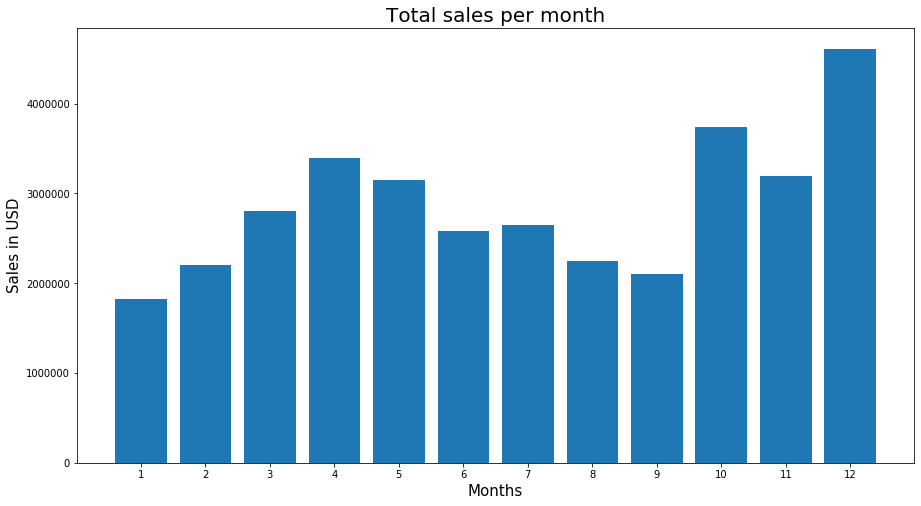

In [30]:
months = range(1,13)
plt.figure(figsize=(15,8))
plt.bar(months, month_sales['Total Sales'])
plt.xticks(months)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sales in USD',fontsize = 15)
plt.title('Total sales per month',fontsize=20)
plt.show()

Here, we can see that the sales are maximum in the month of December. It can be concluded that many people buys gifts for there loved ones in Christmas. 
Moreover, many company also provides christmas bonus to their employes resulting in people upgrade or buy electronic goods.

## 4. On which day of the week, the sales seems to be highest?
_____

### 4.1. Adding necessary columns

Adding a column 'Day of Week' extracted from 'Order Date' column using dt.day_name() function

In [31]:
df['Day of Week'] = df['Order Date'].dt.day_name()

we check the data frame

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Friday
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Sunday
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Tuesday


### 4.2. Obtaining the sum of sales and reseting index

Grouping the sum of 'Total Sales' by 'Day of Week'. After grouping, it has been seen that the df.groupby() function has created the days as the index so we first add the 'Day of Week' as a column.

And then, we drop the index.

In [33]:
weekday_sales = df.groupby('Day of Week').sum()
weekday_sales['Day of Week'] = weekday_sales.index
weekday_sales.reset_index(drop=True, inplace=True)

In [34]:
weekday_sales.head(10)

,Quantity Ordered,Price Each,Total Sales,Month,Day of Week
0,29448,4.830796e+06,4.855938e+06,184699,Friday
1,29899,4.850764e+06,4.883327e+06,190462,Monday
2,29769,4.873105e+06,4.904357e+06,185836,Saturday
3,29778,4.903227e+06,4.932170e+06,188819,Sunday
4,29662,4.810040e+06,4.839465e+06,185521,Thursday
5,30724,5.061153e+06,5.087957e+06,193238,Tuesday
6,29799,4.960046e+06,4.988822e+06,184072,Wednesday


### 4.3. Setting correct day order

Sorting the day of the week in correct order as the above results are alphabetically ordered.

In [35]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekday_sales['Day of Week'] = pd.Categorical(weekday_sales['Day of Week'], categories=days, ordered=True)

### 4.4. Visualizing results using Seaborn library

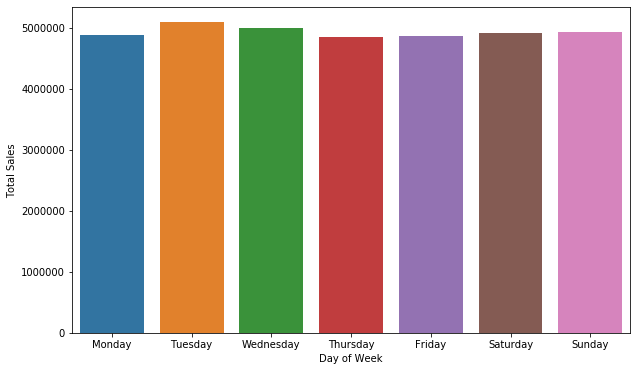

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(y='Total Sales', x='Day of Week', data = weekday_sales)

We see that the sales figures does not show large variations. But, still we can say that maximum sales hapens on Tuesday. 

## 5. What is the best time of a day to target advertisments?

____

### 5.1. Adding necessary columns

In [37]:
df['Hour'] = df['Order Date'].dt.hour

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Tuesday,9


### 5.2. Getting required sum of sales grouped by Hour in a day

In [39]:
hour_sales = df.groupby('Hour').sum()
hour_sales.head()

,Quantity Ordered,Price Each,Total Sales,Month
Hour,,,,
0,4428,709296.70,713721.27,27554
1,2619,458490.00,460866.88,16657
2,1398,233833.64,234851.44,8507
3,928,144726.42,145757.89,5904
4,937,162058.18,162661.01,6148


### 5.3. Visualizing the results 

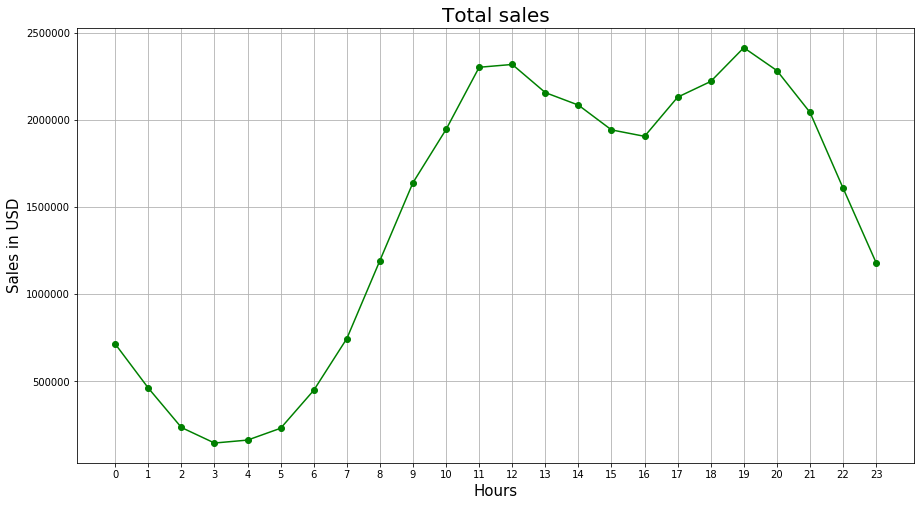

In [40]:
hours = range(0,24)
plt.figure(figsize=(15,8))
plt.plot(hours, hour_sales['Total Sales'], color = 'green', marker ='o')
plt.xticks(hours)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Sales in USD',fontsize = 15)
plt.title('Total sales',fontsize=20)
plt.grid()
plt.show()

From above plot, we can see that between 11:00 Hrs and 12:00 Hrs the sales are peaked.
And then, peaked maximun at 19:00 Hrs.

So best time to target ads to the customers is around 11:00 Hrs in the morning and 18:00 Hrs in the evening.

## 6. What city has the highest sales?

____

### 6.1. Extracting the city and State Code from the 'Purchase Address' column

The reson behind also extracting the state code is that many US cities has same name

In [41]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['ZIP'] = df['Purchase Address'].apply(lambda y: y.split(',')[2][:3])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour,City,ZIP
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Friday,8,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Sunday,22,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Tuesday,9,Los Angeles,CA


In [42]:
df['ZIP'].unique()

array([' TX', ' MA', ' CA', ' WA', ' GA', ' NY', ' OR', ' ME'],
      dtype=object)

Adding city and state code into the 'City' column

In [43]:
df['City'] = df['City'] + ' ' + df['ZIP']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour,City,ZIP
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Friday,8,Dallas TX,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Sunday,22,Boston MA,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14,Los Angeles CA,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14,Los Angeles CA,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Tuesday,9,Los Angeles CA,CA


Dropping 'ZIP' column from the data frame

In [44]:
df = df.drop('ZIP', axis =1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Friday,8,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Sunday,22,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Tuesday,9,Los Angeles CA


### 6.2. Getting the total sale number grouped by the cities

In [45]:
city_sales = df.groupby('City').sum()
city_sales['City'] = city_sales.index
city_sales.reset_index(drop=True, inplace=True)
city_sales

,Quantity Ordered,Price Each,Total Sales,Month,Hour,City
0,16602,2.779908e+06,2.795499e+06,104794,214264,Atlanta GA
1,11153,1.809874e+06,1.819582e+06,69829,141946,Austin TX
2,22528,3.637410e+06,3.661642e+06,141112,288225,Boston MA
3,16730,2.752628e+06,2.767975e+06,104620,214390,Dallas TX
4,33289,5.421435e+06,5.452571e+06,208325,427444,Los Angeles CA
5,27932,4.635371e+06,4.664317e+06,175741,357696,New York City NY
6,2750,4.471893e+05,4.497583e+05,17144,35211,Portland ME
7,11303,1.860558e+06,1.870732e+06,70621,144421,Portland OR
8,50239,8.211462e+06,8.262204e+06,315520,643265,San Francisco CA
9,16553,2.733296e+06,2.747755e+06,104941,213292,Seattle WA


### 6.3. Visualizing results

Using Seaborn library

Text(0.5, 1.0, 'Total sales per city')

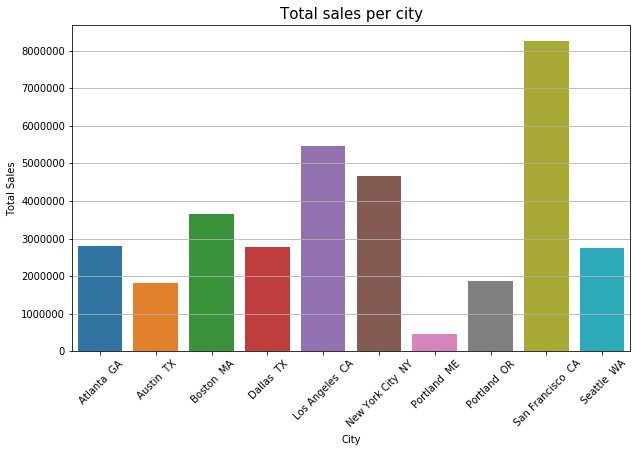

In [46]:
plt.figure(figsize=(10,6))
city_bar = sns.barplot(y='Total Sales', x='City', data = city_sales)
city_bar.set_xticklabels(city_bar.get_xticklabels(), rotation=45)
city_bar.grid(axis='y')
city_bar.set_title('Total sales per city', fontsize = 15)

We can see that two cities of California are in 1st and second place. California is the most populated state in US followed with ca. 12 % of total US population. 

Moreover, San Francisco has the highest concentration of Tech companies and startups in USA.

## 7. Which products are most probably sold together?
________________

### 7.1. Creating a new data frame into which, one time occuring order IDs are removed 

In [47]:
df_product = df[df['Order ID'].duplicated(keep = False)]

df_product.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour,City
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14,Los Angeles CA
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Wednesday,19,Los Angeles CA
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Wednesday,19,Los Angeles CA
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Sunday,11,Boston MA


### 7.2. Creating a new column 'Grouped Product' to accumalate all the product with same order id

In [48]:
df_product['Grouped Product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))
df_product.head()

C:\Users\ranas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day of Week,Hour,City,Grouped Product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Friday,14,Los Angeles CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Friday,14,Los Angeles CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Wednesday,19,Los Angeles CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Wednesday,19,Los Angeles CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Sunday,11,Boston MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."


we remove the duplicates

In [49]:
df_product = df_product[['Order ID', 'Grouped Product']].drop_duplicates()
df_product.head()

,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### 7.3. Using itertools and collections dictionaries to get the most commonly occuring pairs

In [50]:
from itertools import combinations
from collections import Counter

In [51]:
count = Counter()

for row in df_product['Grouped Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # the argumet 2 can be change to 3, to get mostly sold 3 products together
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From above list, we can see that Iphone and Lightning charging cable are sold the most followed by google phone and usb-c charging cable.

The products sold together can be placed near to each other in the store or can be recommended to the customer during checkout in online shopping.  

## 8. Which product is most sold?
________________

### 8.1. Creating two new data frames to get the list of most product sold

In [52]:
product_sold = df.groupby('Product')
order_quantity = product_sold.sum()['Quantity Ordered']
order_quantity.head()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

### 8.2. Visualizing the result

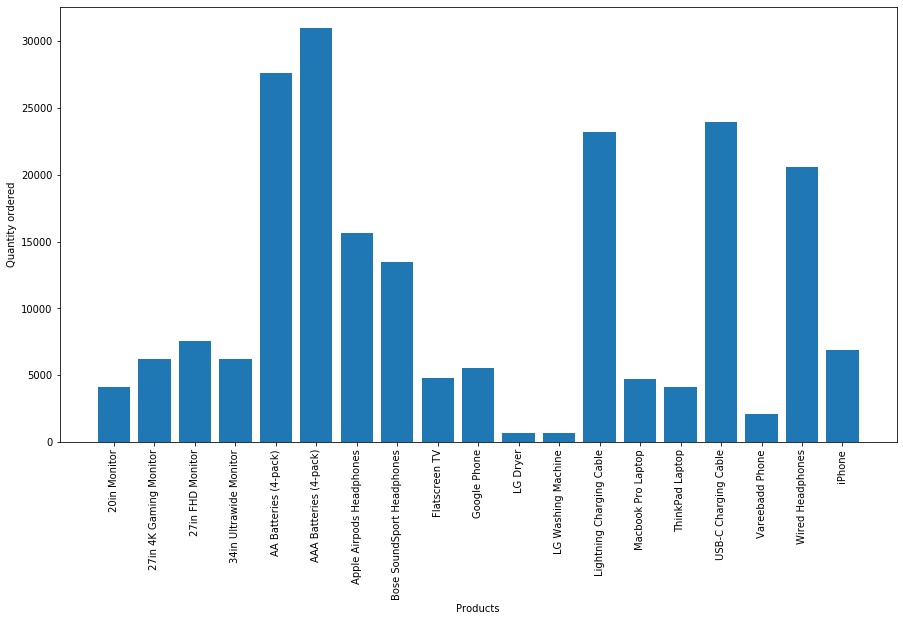

In [53]:
products = [product for product, df in product_sold]

plt.figure(figsize=(15,8))
plt.bar(products, order_quantity)
plt.xticks(products, rotation ='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity ordered')
plt.show()

### 8.3. Creating a data frame to collect the average price of the unique products

In [54]:
prices = df.groupby('Product').mean()['Price Each']

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### 8.4. Overlaying the first grapy with the above results

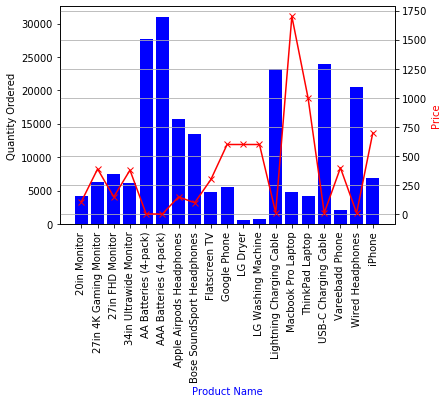

In [93]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, order_quantity, color = 'b')
ax2.plot(products, prices, 'b-', color='red', marker = 'x')

ax1.set_xlabel('Product Name', color = 'b')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price', color = 'r')
ax1.set_xticklabels(products, rotation ='90')
ax2.grid()
plt.show()

From above results, we can see that the batteries, wired headphone, and charging cables are top sold items. These also tends to have low prices so it is obvious that they are sold in large quantities.

Moreover, both iphones and Google phones are sold in good quantities despite of having high price. 

In [94]:
# Saving csv file for future use

df.to_csv('sales_data_cleaned.csv')

___________________

___________________